In [ ]:
import pandas as pd

In [ ]:
!git clone https://github.com/magistery-tps/text-mining.git
!cd text-mining
!conda env create -f environment.yml
!cd datasets/fashion-outfits

fatal: destination path 'text-mining' already exists and is not an empty directory.
/bin/bash: conda: command not found
/bin/bash: line 0: cd: datasets/fashion-outfits: No such file or directory


In [ ]:
ds_resultados=pd.read_csv('/content/text-mining/datasets/fashion-outfits/tfidf_svd_rn-pred-target.csv')
ds_resultados.columns=['item','predictions','target']

cant_palabras=pd.read_csv('/content/text-mining/datasets/fashion-outfits/ds_test_cant_palabras.csv')


In [ ]:
df_test=pd.read_csv('/content/text-mining/datasets/fashion-outfits/test_set.csv')


In [ ]:
df_test['Lenght']=cant_palabras['Length']

In [ ]:
ds_freq_palabras=pd.DataFrame(df_test.groupby('branch').Lenght.mean()).reset_index()
ds_freq_palabras

,branch,Lenght
0,Accessories~Belts~N/D,54.155556
1,Accessories~Hair Accessories~N/D,59.955556
2,Accessories~Hats~N/D,81.712230
3,"Accessories~Phone, Computer & Gadgets~N/D",94.682927
4,Accessories~Scarves~N/D,67.426349
...,...,...
189,Shoes~Slippers~N/D,78.000000
190,Shoes~Trainers~Hi-Tops,89.061538
191,Shoes~Trainers~Low-Tops,100.520681
192,Shoes~Trainers~N/D,116.646724


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(ds_resultados.target, ds_resultados.predictions, labels=df_test.branch.unique())

array([[2577,    0,    3, ...,    0,    0,    0],
       [   0, 4466,    0, ...,    1,    0,    0],
       [   1,    3, 2253, ...,    0,    0,    0],
       ...,
       [   0,    2,    0, ...,    6,    0,    0],
       [   0,    0,    0, ...,    0,   33,    0],
       [   0,    0,    0, ...,    0,    0,   11]])

In [ ]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(ds_resultados.target, ds_resultados.predictions )

from sklearn.metrics import classification_report as cr

metrics=(cr(ds_resultados.target, ds_resultados.predictions ))
print(metrics)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                               precision    recall  f1-score   support

                                        Accessories~Belts~N/D       0.91      0.92      0.91       180
                             Accessories~Hair Accessories~N/D       0.59      0.53      0.56        45
                                         Accessories~Hats~N/D       0.97      0.91      0.94       278
                    Accessories~Phone, Computer & Gadgets~N/D       0.33      0.20      0.25        41
                                      Accessories~Scarves~N/D       0.97      0.98      0.98      2057
                                   Accessories~Sunglasses~N/D       0.99      0.97      0.98       203
                              Accessories~Ties & Bow Ties~N/D       1.00      0.91      0.96        35
                        Accessories~Wallets & Cardholders~N/D       0.53      0.54      0.54        35
                             Accessories~Wallets & Purses~N/D       0.65

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def get_classification_report(y_test, y_pred):
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
    df_classification_report.drop(['weighted avg'], axis=0, inplace=True)
    df_classification_report.drop(['macro avg'], axis=0, inplace=True)
    df_classification_report.drop(['accuracy'], axis=0, inplace=True)
    df_classification_report.reset_index(),
    return df_classification_report

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


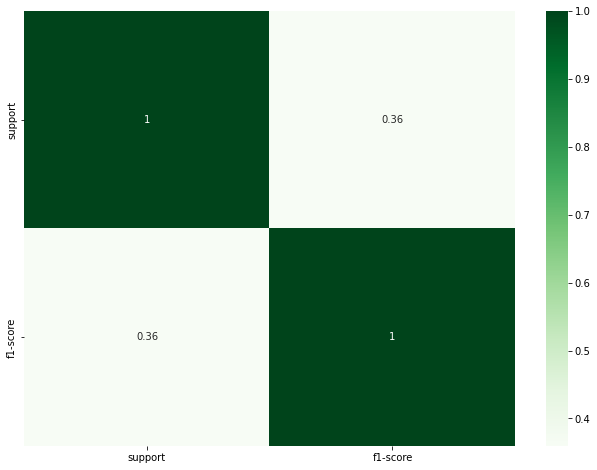

In [ ]:
rpt=get_classification_report(ds_resultados.target, ds_resultados.predictions )


import seaborn as sns
from matplotlib import pyplot as plt

corr = rpt[['support','f1-score']].corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

In [ ]:
rpt=rpt.reset_index()
rpt.columns=['branch','precision','recall',	'f1-score','support']

In [ ]:
rpt

,branch,precision,recall,f1-score,support
0,Accessories~Sunglasses~N/D,0.989950,0.970443,0.980100,203.0
1,Clothing~Polo Shirts~N/D,0.969921,0.987946,0.978850,1991.0
2,Bags~Backpacks~N/D,0.981287,0.974448,0.977855,861.0
3,Shoes~Boots~N/D,0.980354,0.974609,0.977473,512.0
4,Accessories~Scarves~N/D,0.973468,0.981040,0.977240,2057.0
...,...,...,...,...,...
189,Activewear~Performance Footwear~Performance Tr...,0.000000,0.000000,0.000000,37.0
190,Clothing~Tops~Cardigans,0.000000,0.000000,0.000000,65.0
191,Clothing~Tops~N/D,0.000000,0.000000,0.000000,56.0
192,Clothing~Dresses~Beach Dresses,0.000000,0.000000,0.000000,42.0


In [ ]:
rpt=ds_freq_palabras.merge(rpt,on='branch')

In [ ]:
rpt

,branch,Lenght,precision,recall,f1-score,support
0,Accessories~Belts~N/D,54.155556,0.906593,0.916667,0.911602,180.0
1,Accessories~Hair Accessories~N/D,59.955556,0.585366,0.533333,0.558140,45.0
2,Accessories~Hats~N/D,81.712230,0.969466,0.913669,0.940741,278.0
3,"Accessories~Phone, Computer & Gadgets~N/D",94.682927,0.333333,0.195122,0.246154,41.0
4,Accessories~Scarves~N/D,67.426349,0.973468,0.981040,0.977240,2057.0
...,...,...,...,...,...,...
189,Shoes~Slippers~N/D,78.000000,0.538462,0.205882,0.297872,34.0
190,Shoes~Trainers~Hi-Tops,89.061538,0.826087,0.584615,0.684685,65.0
191,Shoes~Trainers~Low-Tops,100.520681,0.858696,0.961071,0.907003,411.0
192,Shoes~Trainers~N/D,116.646724,0.945402,0.937322,0.941345,351.0


In [ ]:
rpt

,branch,Lenght,precision,recall,f1-score,support
0,Accessories~Belts~N/D,54.155556,0.906593,0.916667,0.911602,180.0
1,Accessories~Hair Accessories~N/D,59.955556,0.585366,0.533333,0.558140,45.0
2,Accessories~Hats~N/D,81.712230,0.969466,0.913669,0.940741,278.0
3,"Accessories~Phone, Computer & Gadgets~N/D",94.682927,0.333333,0.195122,0.246154,41.0
4,Accessories~Scarves~N/D,67.426349,0.973468,0.981040,0.977240,2057.0
...,...,...,...,...,...,...
189,Shoes~Slippers~N/D,78.000000,0.538462,0.205882,0.297872,34.0
190,Shoes~Trainers~Hi-Tops,89.061538,0.826087,0.584615,0.684685,65.0
191,Shoes~Trainers~Low-Tops,100.520681,0.858696,0.961071,0.907003,411.0
192,Shoes~Trainers~N/D,116.646724,0.945402,0.937322,0.941345,351.0


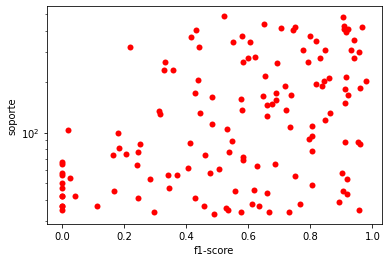

In [ ]:
fig = plt.figure()
ax = plt.gca()
ax.plot(rpt.query("support<500")['f1-score'] ,rpt.query("support<500")['support'], 'o', c='red',  markeredgecolor='none')
ax.set_yscale('log')
ax.set_ylabel('soporte')
ax.set_xlabel('f1-score')
#plt.plot(rpt['precision']+0.0001, rpt.support)
plt.show()

In [ ]:
rpt

,branch,Lenght,precision,recall,f1-score,support
0,Accessories~Belts~N/D,54.155556,0.906593,0.916667,0.911602,180.0
1,Accessories~Hair Accessories~N/D,59.955556,0.585366,0.533333,0.558140,45.0
2,Accessories~Hats~N/D,81.712230,0.969466,0.913669,0.940741,278.0
3,"Accessories~Phone, Computer & Gadgets~N/D",94.682927,0.333333,0.195122,0.246154,41.0
4,Accessories~Scarves~N/D,67.426349,0.973468,0.981040,0.977240,2057.0
...,...,...,...,...,...,...
189,Shoes~Slippers~N/D,78.000000,0.538462,0.205882,0.297872,34.0
190,Shoes~Trainers~Hi-Tops,89.061538,0.826087,0.584615,0.684685,65.0
191,Shoes~Trainers~Low-Tops,100.520681,0.858696,0.961071,0.907003,411.0
192,Shoes~Trainers~N/D,116.646724,0.945402,0.937322,0.941345,351.0


In [ ]:
import os
ejemplo_dir = '/content/text-mining/datasets/fashion-outfits'
contenido = os.listdir(ejemplo_dir)

In [ ]:
for c in contenido:
    
  if 'pred-target' in c:
   namec=c.replace('.csv','')
   print (namec)
   try:
       # Do something. 
      print(pd.read_csv('/content/text-mining/datasets/fashion-outfits'+'/'+c))
      ds_all[namec]=pd.read_csv('/content/text-mining/datasets/fashion-outfits'+'/'+c)['prediction']
      print(ds_all)

  
   except NameError:
      ds_all=pd.read_csv('/content/text-mining/datasets/fashion-outfits'+'/'+c)
      ds_all.rename(columns = {'prediction':namec}, inplace = True)


rn-word2vect_avg-pred-target
        Unnamed: 0                                     prediction  \
0                0           Clothing~Sweaters & Knitwear~Hoodies   
1                1               Clothing~Tops~T-shirts & Jerseys   
2                2                  Clothing~Trousers~Track Pants   
3                3                          Clothing~Tops~Blouses   
4                4                  Shoes~Flip Flops & Slides~N/D   
...            ...                                            ...   
118327      118327         Clothing~Jackets~Padded & Down Jackets   
118328      118328                  Clothing~Skirts~A-Line Skirts   
118329      118329                Clothing~Tops~Vests & Tank Tops   
118330      118330  Clothing~Jackets~Sport Jackets & Windbreakers   
118331      118331                          Clothing~Tops~Blouses   

                                      target  
0       Clothing~Sweaters & Knitwear~Hoodies  
1           Clothing~Tops~T-shirts & Jerseys  
2

In [ ]:
targets=pd.DataFrame(ds_resultados['target'])

In [ ]:
del(ds_all['bayes-pred-target'])

In [ ]:
#del(ds_all['bert-pred-target'])

In [ ]:
ds_t=pd.DataFrame(ds_all.T)

In [ ]:
ds_t

,0,1,2,3,4,5,6,7,8,9,...,118322,118323,118324,118325,118326,118327,118328,118329,118330,118331
rn-word2vect_avg-pred-target,Clothing~Sweaters & Knitwear~Hoodies,Clothing~Tops~T-shirts & Jerseys,Clothing~Trousers~Track Pants,Clothing~Tops~Blouses,Shoes~Flip Flops & Slides~N/D,Clothing~Sweaters & Knitwear~Hoodies,Clothing~Dresses~Day Dresses,Bags~Tote Bags~N/D,Clothing~Knitwear~Knitted Tops,Clothing~Skirts~High-Waisted Skirts,...,Clothing~Knitwear~Knitted Tops,Shoes~Trainers~N/D,Clothing~Dresses~Cocktail & Party Dresses,Jewellery~Rings~N/D,Clothing~Shorts~Short Shorts,Clothing~Jackets~Padded & Down Jackets,Clothing~Skirts~A-Line Skirts,Clothing~Tops~Vests & Tank Tops,Clothing~Jackets~Sport Jackets & Windbreakers,Clothing~Tops~Blouses
rn-embedding-Lstm-bid-bigrams-pred-target,Clothing~Sweaters & Knitwear~Hoodies,Clothing~Tops~T-shirts & Jerseys,Clothing~Trousers~Track Pants,Clothing~Tops~T-shirts & Jerseys,Shoes~Sandals~N/D,Clothing~Sweaters & Knitwear~Hoodies,Clothing~Dresses~Day Dresses,Bags~Tote Bags~N/D,Clothing~Dresses~Day Dresses,Clothing~Skirts~Asymmetric & Draped Skirts,...,Clothing~Knitwear~Knitted Tops,Shoes~Trainers~N/D,Clothing~Dresses~Day Dresses,Jewellery~Rings~N/D,Clothing~Shorts~Short Shorts,Clothing~Jackets~Bomber Jackets,Clothing~Skirts~A-Line Skirts,Clothing~Tops~Vests & Tank Tops,Clothing~Jackets~Bomber Jackets,Clothing~Tops~T-shirts & Jerseys
tfidf_svd_rn-pred-target,Clothing~Sweaters & Knitwear~Hoodies,Clothing~Tops~Shirts,Clothing~Trousers~Track Pants,Clothing~Tops~T-shirts & Jerseys,Shoes~Flip Flops & Slides~N/D,Clothing~Sweaters & Knitwear~Hoodies,Clothing~Knitwear~Knitted Dresses,Bags~Tote Bags~N/D,Clothing~Knitwear~Knitted Tops,Clothing~Skirts~High-Waisted Skirts,...,Clothing~Knitwear~Knitted Tops,Shoes~Trainers~N/D,Clothing~Dresses~Day Dresses,Jewellery~Rings~N/D,Clothing~Shorts~Short Shorts,Clothing~Jackets~Lightweight Jackets,Clothing~Skirts~A-Line Skirts,Clothing~Tops~Vests & Tank Tops,Clothing~Jackets~Sport Jackets & Windbreakers,Clothing~Tops~T-shirts & Jerseys
rn-unigrams-embedding-pred-target,Clothing~Sweaters & Knitwear~Hoodies,Clothing~Tops~Shirts,Clothing~Trousers~Track Pants,Clothing~Tops~T-shirts & Jerseys,Shoes~Flip Flops & Slides~N/D,Clothing~Sweaters & Knitwear~Hoodies,Clothing~Dresses~Day Dresses,Bags~Tote Bags~N/D,Clothing~Dresses~Day Dresses,Clothing~Skirts~A-Line Skirts,...,Clothing~Knitwear~Knitted Tops,Shoes~Trainers~N/D,Clothing~Dresses~Cocktail & Party Dresses,Jewellery~Rings~N/D,Clothing~Shorts~Short Shorts,Clothing~Jackets~Shirt Jackets,Clothing~Skirts~A-Line Skirts,Clothing~Tops~Vests & Tank Tops,Clothing~Jackets~Lightweight Jackets,Clothing~Tops~T-shirts & Jerseys
bert-pred-target,clothing~sweaters & knitwear~hoodies,clothing~trousers~track pants,clothing~tops~vests & tank tops,clothing~sweaters & knitwear~hoodies,clothing~dresses~day dresses,bags~tote bags~n/d,clothing~dresses~day dresses,clothing~skirts~straight skirts,clothing~jackets~fitted jackets,clothing~tops~t-shirts & jerseys,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
i=0
votacioin=[]
i=0
while i<len(ds_all.values):
 votacioin.append( ds_t[i].str.lower().value_counts().index[0])
 i=i+1
  


Streaming output truncated to the last 5000 lines.
113332
113333
113334
113335
113336
113337
113338
113339
113340
113341
113342
113343
113344
113345
113346
113347
113348
113349
113350
113351
113352
113353
113354
113355
113356
113357
113358
113359
113360
113361
113362
113363
113364
113365
113366
113367
113368
113369
113370
113371
113372
113373
113374
113375
113376
113377
113378
113379
113380
113381
113382
113383
113384
113385
113386
113387
113388
113389
113390
113391
113392
113393
113394
113395
113396
113397
113398
113399
113400
113401
113402
113403
113404
113405
113406
113407
113408
113409
113410
113411
113412
113413
113414
113415
113416
113417
113418
113419
113420
113421
113422
113423
113424
113425
113426
113427
113428
113429
113430
113431
113432
113433
113434
113435
113436
113437
113438
113439
113440
113441
113442
113443
113444
113445
113446
113447
113448
113449
113450
113451
113452
113453
113454
113455
113456
113457
113458
113459
113460
113461
113462
113463
113464
113465
113466
1134

In [ ]:
ds_t[12213].str.lower().value_counts().index[0]


'clothing~knitwear~knitted tops'

In [ ]:
targets['pred_votacion']=votacioin

In [ ]:
targets['targets']=targets.target.str.lower()

In [ ]:
targets

,target,pred_votacion,targets
0,Clothing~Sweaters & Knitwear~Hoodies,clothing~sweaters & knitwear~hoodies,clothing~sweaters & knitwear~hoodies
1,Clothing~Tops~T-shirts & Jerseys,clothing~tops~t-shirts & jerseys,clothing~tops~t-shirts & jerseys
2,Clothing~Trousers~Track Pants,clothing~trousers~track pants,clothing~trousers~track pants
3,Clothing~Tops~T-shirts & Jerseys,clothing~tops~t-shirts & jerseys,clothing~tops~t-shirts & jerseys
4,Shoes~Flip Flops & Slides~N/D,shoes~flip flops & slides~n/d,shoes~flip flops & slides~n/d
...,...,...,...
118327,Clothing~Jackets~Bomber Jackets,clothing~jackets~bomber jackets,clothing~jackets~bomber jackets
118328,Clothing~Skirts~Pencil Skirts,clothing~skirts~a-line skirts,clothing~skirts~pencil skirts
118329,Clothing~Tops~Vests & Tank Tops,clothing~tops~vests & tank tops,clothing~tops~vests & tank tops
118330,Clothing~Jackets~Bomber Jackets,clothing~jackets~sport jackets & windbreakers,clothing~jackets~bomber jackets


In [ ]:
from sklearn import metrics
targets['pred_votacion']=votacioin
metrics=cr(targets.targets, targets.pred_votacion)
print(metrics)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                               precision    recall  f1-score   support

                                        accessories~belts~n/d       0.97      0.93      0.95       180
                             accessories~hair accessories~n/d       0.80      0.80      0.80        45
                                         accessories~hats~n/d       0.95      0.96      0.96       278
                    accessories~phone, computer & gadgets~n/d       0.62      0.44      0.51        41
                                      accessories~scarves~n/d       0.98      0.99      0.98      2057
                                   accessories~sunglasses~n/d       0.99      0.97      0.98       203
                              accessories~ties & bow ties~n/d       0.89      0.97      0.93        35
                        accessories~wallets & cardholders~n/d       0.80      0.69      0.74        35
                             accessories~wallets & purses~n/d       0.62

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
ds_bert

,prediction,target
0,clothing~sweaters & knitwear~hoodies,clothing~sweaters & knitwear~hoodies
1,clothing~trousers~track pants,clothing~trousers~track pants
2,clothing~tops~vests & tank tops,clothing~tops~t-shirts & jerseys
3,clothing~sweaters & knitwear~hoodies,clothing~sweaters & knitwear~hoodies
4,clothing~dresses~day dresses,clothing~dresses~day dresses
...,...,...
111248,clothing~jackets~sport jackets & windbreakers,clothing~jackets~bomber jackets
111249,clothing~skirts~a-line skirts,clothing~skirts~pencil skirts
111250,clothing~tops~vests & tank tops,clothing~tops~vests & tank tops
111251,clothing~jackets~sport jackets & windbreakers,clothing~jackets~bomber jackets


In [ ]:
from sklearn import metrics
ds_bert=pd.read_csv("/content/text-mining/datasets/fashion-outfits/bert-pred-target.csv")
metrics=cr(ds_bert.target, ds_bert.prediction)
print(metrics)

                                                      precision    recall  f1-score   support

                               accessories~belts~n/d       0.98      0.97      0.97       146
                                accessories~hats~n/d       0.94      1.00      0.97       254
                             accessories~scarves~n/d       0.97      0.98      0.98      2000
                          accessories~sunglasses~n/d       1.00      1.00      1.00       186
             activewear~performance tops~sports bras       0.79      0.94      0.86       126
activewear~performance trousers~performance leggings       0.84      0.58      0.69       158
                      activewear~skiwear~ski jackets       0.70      0.47      0.56        78
                                  bags~backpacks~n/d       0.99      0.98      0.98       827
                                  bags~belt bags~n/d       0.83      0.96      0.89       386
                                bags~bucket bags~n/d       

In [ ]:
ds_all

,rn-word2vect_avg-pred-target,rn-embedding-Lstm-bid-bigrams-pred-target,tfidf_svd_rn-pred-target,rn-unigrams-embedding-pred-target,bert-pred-target
0,Clothing~Sweaters & Knitwear~Hoodies,Clothing~Sweaters & Knitwear~Hoodies,Clothing~Sweaters & Knitwear~Hoodies,Clothing~Sweaters & Knitwear~Hoodies,clothing~sweaters & knitwear~hoodies
1,Clothing~Tops~T-shirts & Jerseys,Clothing~Tops~T-shirts & Jerseys,Clothing~Tops~Shirts,Clothing~Tops~Shirts,clothing~trousers~track pants
2,Clothing~Trousers~Track Pants,Clothing~Trousers~Track Pants,Clothing~Trousers~Track Pants,Clothing~Trousers~Track Pants,clothing~tops~vests & tank tops
3,Clothing~Tops~Blouses,Clothing~Tops~T-shirts & Jerseys,Clothing~Tops~T-shirts & Jerseys,Clothing~Tops~T-shirts & Jerseys,clothing~sweaters & knitwear~hoodies
4,Shoes~Flip Flops & Slides~N/D,Shoes~Sandals~N/D,Shoes~Flip Flops & Slides~N/D,Shoes~Flip Flops & Slides~N/D,clothing~dresses~day dresses
...,...,...,...,...,...
118327,Clothing~Jackets~Padded & Down Jackets,Clothing~Jackets~Bomber Jackets,Clothing~Jackets~Lightweight Jackets,Clothing~Jackets~Shirt Jackets,NaN
118328,Clothing~Skirts~A-Line Skirts,Clothing~Skirts~A-Line Skirts,Clothing~Skirts~A-Line Skirts,Clothing~Skirts~A-Line Skirts,NaN
118329,Clothing~Tops~Vests & Tank Tops,Clothing~Tops~Vests & Tank Tops,Clothing~Tops~Vests & Tank Tops,Clothing~Tops~Vests & Tank Tops,NaN
118330,Clothing~Jackets~Sport Jackets & Windbreakers,Clothing~Jackets~Bomber Jackets,Clothing~Jackets~Sport Jackets & Windbreakers,Clothing~Jackets~Lightweight Jackets,NaN
